<a href="https://colab.research.google.com/github/LeTam0101/TRI-TUE-NHAN-TAO/blob/main/TienVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
%cd /content/drive/MyDrive/Colab Notebooks/Giữa kì/TienVN

/content/drive/MyDrive/Colab Notebooks/Giữa kì/TienVN


In [34]:
# Tạo ra class ImageDataGenerator để chỉnh ảnh 
train_datagen=ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [35]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Giữa kì/TienVN/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 539 images belonging to 6 classes.


In [36]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Giữa kì/TienVN/Val',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 139 images belonging to 6 classes.


In [37]:
training_set.class_indices

{'100k': 0, '10k': 1, '20k': 2, '500k': 3, '50k': 4, '5k': 5}

In [38]:
validation.class_indices

{'100k': 0, '10k': 1, '20k': 2, '500k': 3, '50k': 4, '5k': 5}

In [39]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [40]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
17/17 [==============================] - 17s 814ms/step - loss: 3.3771 - accuracy: 0.1707 - val_loss: 1.7843 - val_accuracy: 0.1583
Epoch 2/50
17/17 [==============================] - 13s 801ms/step - loss: 1.7950 - accuracy: 0.1837 - val_loss: 1.7900 - val_accuracy: 0.1942
Epoch 3/50
17/17 [==============================] - 14s 812ms/step - loss: 1.7909 - accuracy: 0.2041 - val_loss: 1.7771 - val_accuracy: 0.2662
Epoch 4/50
17/17 [==============================] - 14s 806ms/step - loss: 1.7890 - accuracy: 0.1929 - val_loss: 1.7564 - val_accuracy: 0.1223
Epoch 5/50
17/17 [==============================] - 14s 815ms/step - loss: 1.7094 - accuracy: 0.2152 - val_loss: 1.6368 - val_accuracy: 0.3022
Epoch 6/50
17/17 [==============================] - 14s 803ms/step - loss: 1.6034 - accuracy: 0.3173 - val_loss: 1.5759 - val_accuracy: 0.4029
Epoch 7/50
17/17 [==============================] - 14s 818ms/step - loss: 1.5531 - accuracy: 0.3618 - val_loss: 1.5253 - val_accuracy: 0.3741

In [41]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.13340958952903748
Train Accuracy 0.9536178112030029


In [42]:
# Lưu lại
model.save("TienVN.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('TienVN.h5')

1/1 [==============================] - 0s 94ms/step
100k


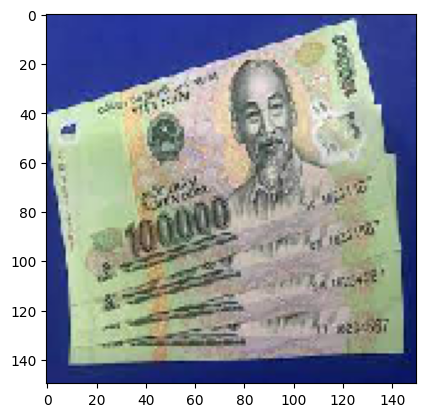

1/1 [==============================] - 0s 19ms/step
50k


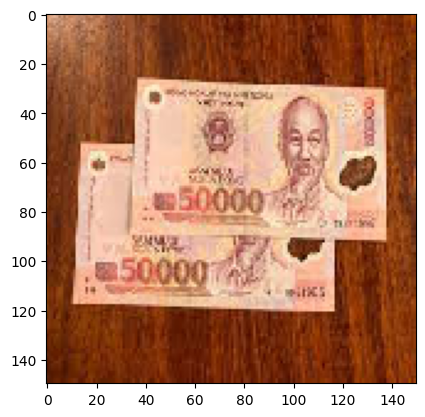

1/1 [==============================] - 0s 20ms/step
50k


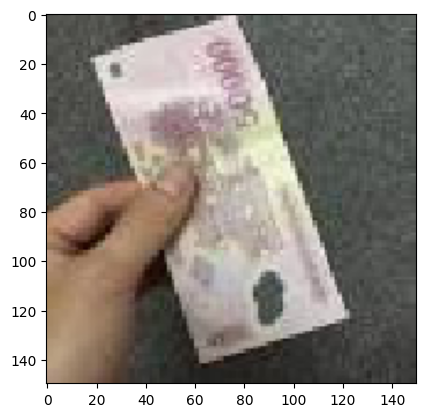

1/1 [==============================] - 0s 19ms/step
20k


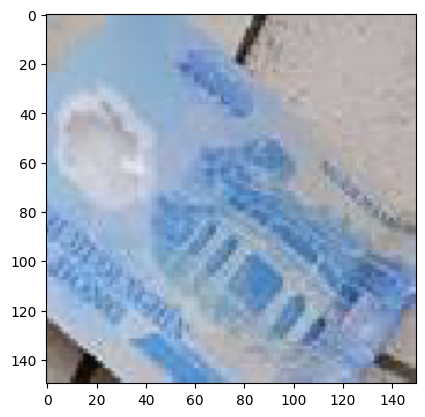

1/1 [==============================] - 0s 22ms/step
10k


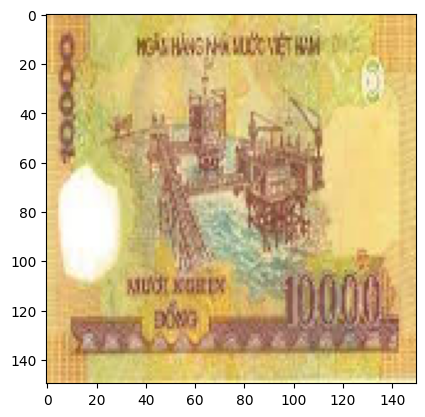

1/1 [==============================] - 0s 19ms/step
50k


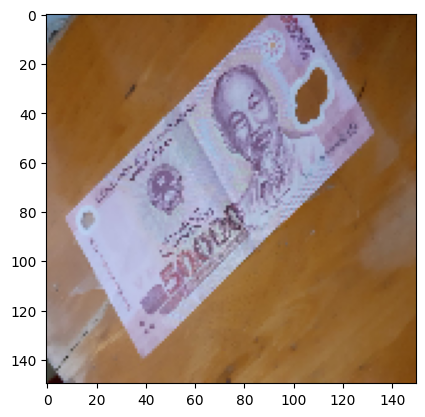

1/1 [==============================] - 0s 21ms/step
5k


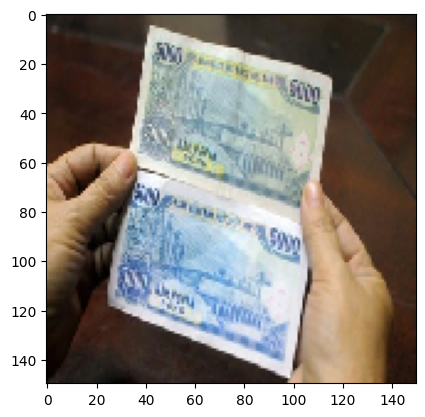

1/1 [==============================] - 0s 33ms/step
500k


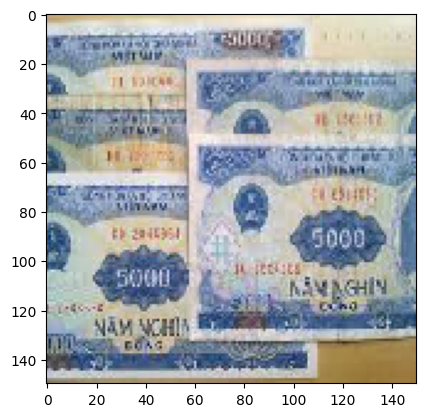

1/1 [==============================] - 0s 25ms/step
10k


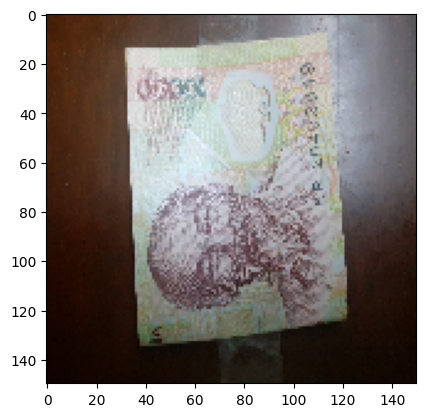

1/1 [==============================] - 0s 21ms/step
10k


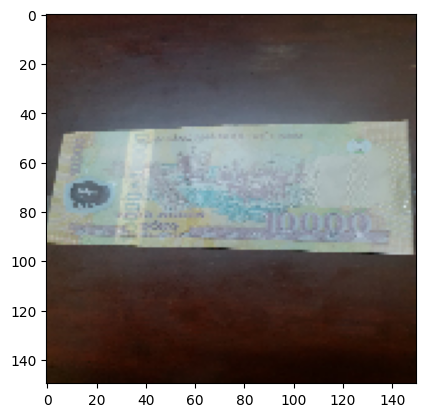

1/1 [==============================] - 0s 20ms/step
20k


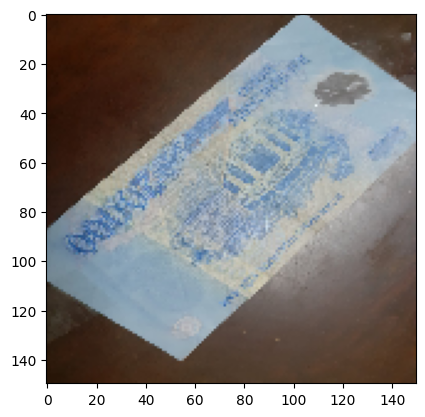

1/1 [==============================] - 0s 20ms/step
20k


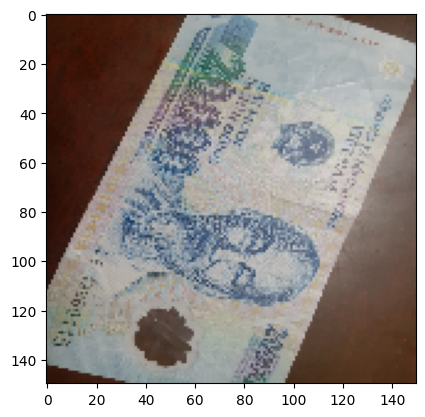

1/1 [==============================] - 0s 22ms/step
100k


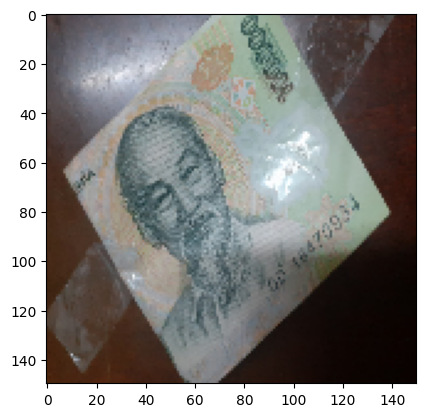

1/1 [==============================] - 0s 28ms/step
100k


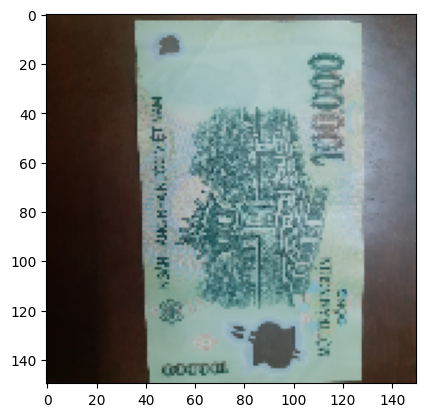

1/1 [==============================] - 0s 27ms/step
500k


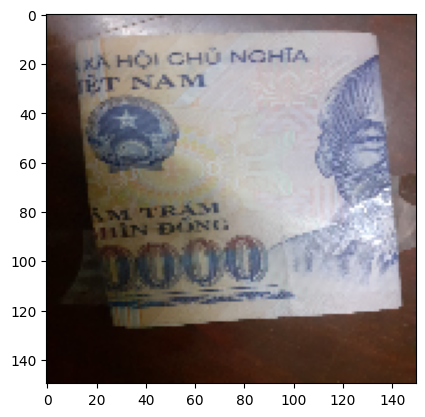

1/1 [==============================] - 0s 20ms/step
500k


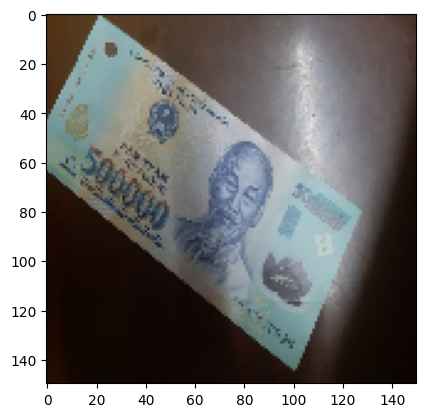

1/1 [==============================] - 0s 25ms/step
500k


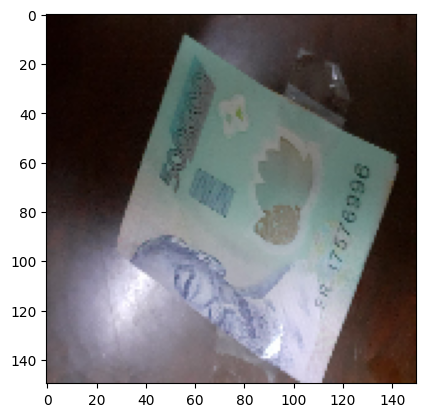

1/1 [==============================] - 0s 36ms/step
5k


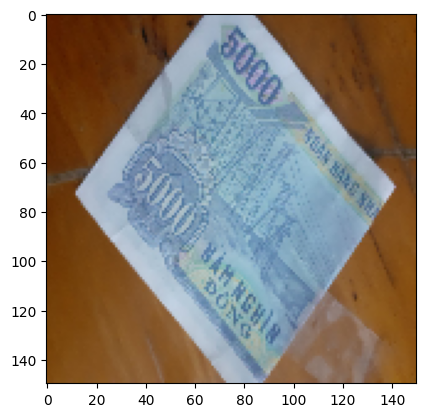

In [44]:
Test = "/content/drive/MyDrive/Colab Notebooks/Giữa kì/TienVN/Test"
for i in os.listdir(Test):
  img=load_img(Test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='100k'
  if round(result[0][1])==1:
    prediction='10k'
  if round(result[0][2])==1:
    prediction='20k'
  if round(result[0][3])==1:
    prediction='500k'
  if round(result[0][4])==1:
    prediction='50k'
  if round(result[0][5])==1:
    prediction='5k'
  print(prediction)
  plt.show()

In [47]:
!jupyter nbconvert --to html "/content/TienVN.ipynb"

[NbConvertApp] Converting notebook /content/TienVN.ipynb to html
[NbConvertApp] Writing 4932038 bytes to /content/TienVN.html
